In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
df1 = pd.read_csv("pokemon.csv")
df= pd.DataFrame(df1)

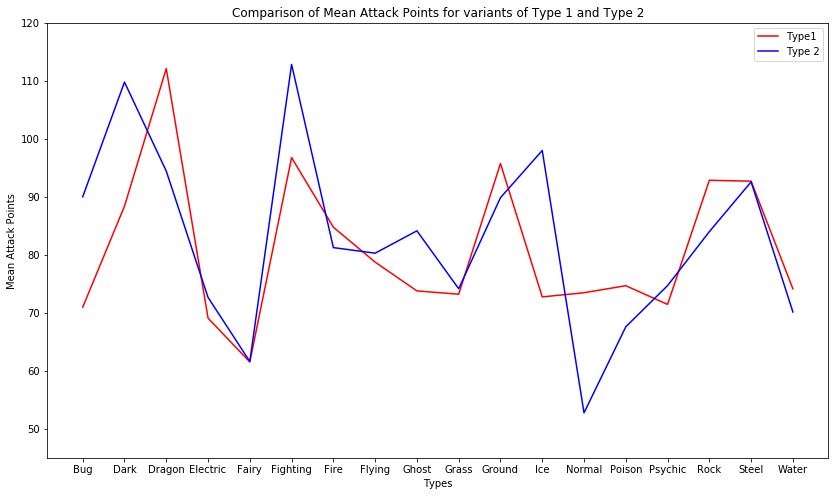

In [20]:
# Code starts here

# Type 1 mean attack points dataframe for every category
type_1 = df.groupby(['Type 1'])[['Attack']].mean()

# Type 2 mean attack points dataframe for every category
type_2 = df.groupby(['Type 2'])[['Attack']].mean()

# Reset index for both dataframes
type_1.reset_index(inplace=True)
type_2.reset_index(inplace=True)

# Merge both dataframes
merged = type_1.merge(type_2 , left_on = 'Type 1' , right_on= 'Type 2' )

# Drop 'Type 1' column permanently
merged.drop(['Type 1'],axis = 1 , inplace= True)
# Rename column
merged.rename(columns={'Type 2':'Type'},inplace= True)

# Set size of the figure
plt.figure(figsize=(14,8))

# Line plot for 'Type 1' Pokemon mean attack points
plt.plot(merged['Type'],merged['Attack_x'],color='red')

# Line plot for 'Type 2' Pokemon mean attack points
plt.plot(merged['Type'],merged['Attack_y'],color= 'blue')

# Setting X-axis label
plt.xlabel('Types')
# Setting Y-axis label
plt.ylabel('Mean Attack Points')

# Title of the plot
plt.title('Comparison of Mean Attack Points for variants of Type 1 and Type 2')

# Setting Y-axis limit
plt.ylim(45,120)

# Legend 
plt.legend(labels=['Type1','Type 2'])

# Display plot
plt.show()

# Code ends here

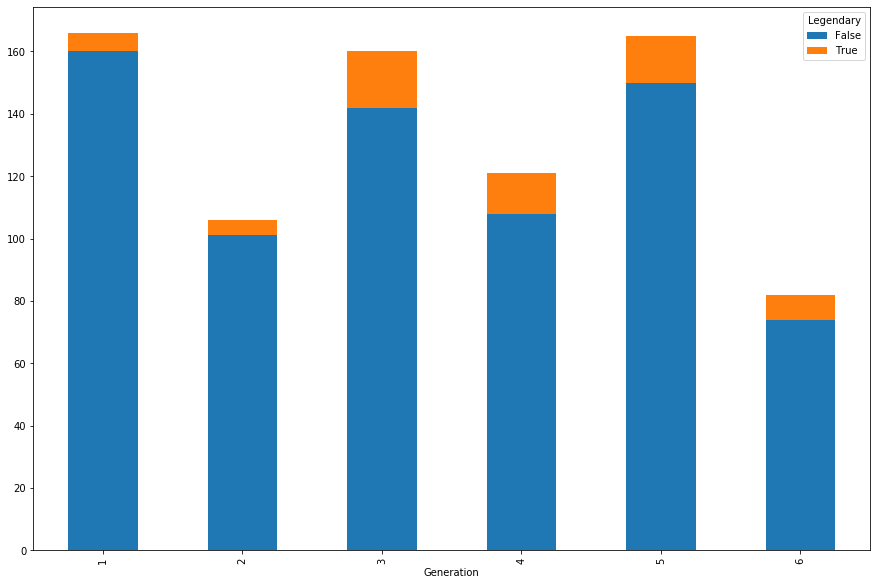

In [22]:
res = df.groupby(['Generation','Legendary']).size().unstack()

# Plot stacked bar chart
res.plot(kind='bar',stacked = True , figsize=(15,10))

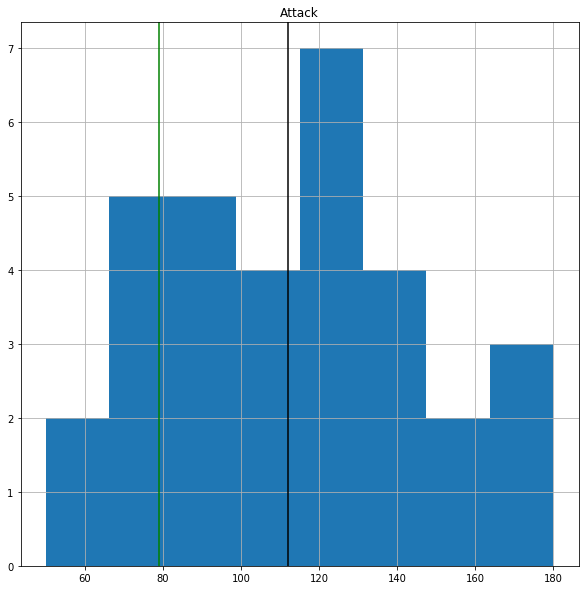

In [23]:
# Code starts here

# Mean 'Attack' for all Pokemons
mean_attack = df['Attack'].mean()

# Mean 'Attack' for Dragon type Pokemons
dragon = df[df['Type 1']=='Dragon']
# Histogram for Dragon type Pokemons

mean_dragon = dragon['Attack'].mean()
# Display plot
dragon.hist(column = 'Attack', bins = 8 , figsize=(10,10))
plt.axvline(x=mean_attack , color='green')
plt.axvline(x=mean_dragon , color='black')

plt.show()
# Code ends here

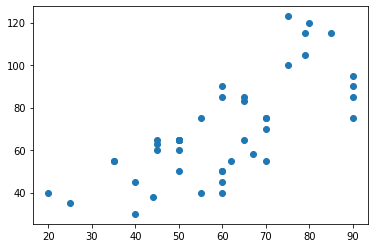

In [24]:
# Code starts here

# Conditional filtering for 'Electric' pokemons
Electric = df[df['Type 1']=='Electric']

# Scatter plot for 'Attack' vs 'HP'
plt.scatter(Electric['HP'], Electric['Attack'])

# Display plot
plt.show()

# Code ends here

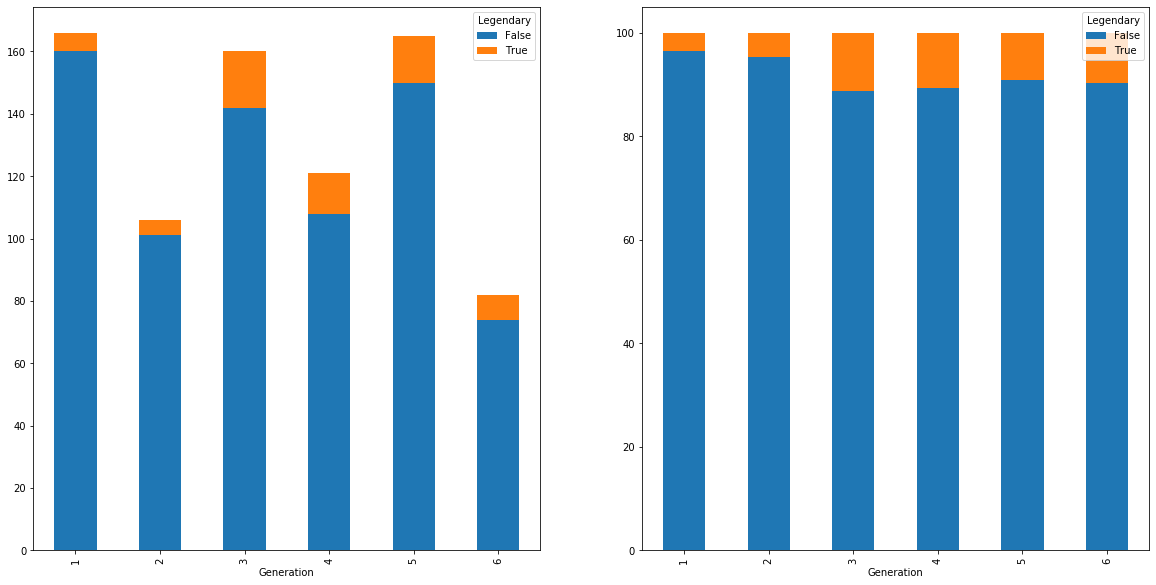

In [4]:
# Initialize figure and axes
figure , (ax_1 ,ax_2) = plt.subplots(1,2 , figsize=(20,10))

# Stacked bar-chart representing counts
res = df.groupby(['Generation','Legendary']).size().unstack()
res.plot(kind='bar', stacked=True, ax=ax_1)



# Stacked bar-chart representing percentages
new_res =res.fillna(0)
new_res['Total'] = new_res[True] + new_res[False]
new_res[True] = (new_res[True] / new_res['Total']) * 100
new_res[False] = (new_res[False] / new_res['Total']) * 100
new_res.drop('Total', inplace=True, axis=1)
new_res.plot(kind='bar', stacked=True, ax=ax_2)




